# Statistics

In the statistics module we analyze data for different responses and at different spectral peak locations.
We use Python package scipy in this module.


## T-Test
T-test checks for difference in the mean between two sample from different responses. We assume the data is independent and follows the normality assumption.
Let $x_1, \ldots, x_n$ and $y_1,\ldots ,y_m$ be the two samples and we test whether the means are equal. The null hypothesis states means $\mu_1$ and $\mu_2$ are equal
and the alternative hypothesis states they are not equal. If the p-value is lower than the chosen significance level, we can reject the null hypothesis, i.e. the samples do not have the same means.


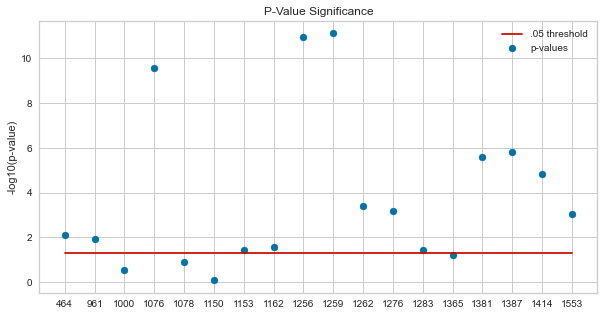

In [1]:
        import modules.adapml_data as adapml_data
        import modules.adapml_classification as adapml_classification
        import modules.adapml_clustering as adapml_clustering
        import modules.adapml_chemometrics as adapml_chemometrics
        import modules.adapml_statistics as adapml_statistics
        import modules.adapml_regression as adapml_regression
        import numpy as np
        import modules.loadTestData as load_data
        import sklearn.preprocessing as pre
        from sklearn.cross_decomposition import PLSRegression as PLS
        from matplotlib import pyplot as plt
        from sklearn import cluster as clst
        from scipy.cluster.hierarchy import dendrogram

        import os

        reldir = os.getcwd()
        path_to_data = os.path.join(reldir, '..', 'data', 'SCLC_study_output_filtered_2.csv')

        data = adapml_data.DataImport(path_to_data)

        response1D = data.resp
        #response1D = adapml_data.DataImport.getResponse(path_to_data)
        response2D = adapml_data.DataImport.getDummyResponse(response1D)

        variables = data.getVariableNames()
        samples = data.getSampleNames()

        t_test = adapml_statistics.Statistics(data.data, 'anova', response1D)
        t_test.plot_logp_values(variables)


        

## Volcano Plot

Volcano plot is a scatter plot which demonstrates magnitude between the responses and t-test significance of the data. We can choose a significance level and fold change limit
to specify the rectangle of interest.


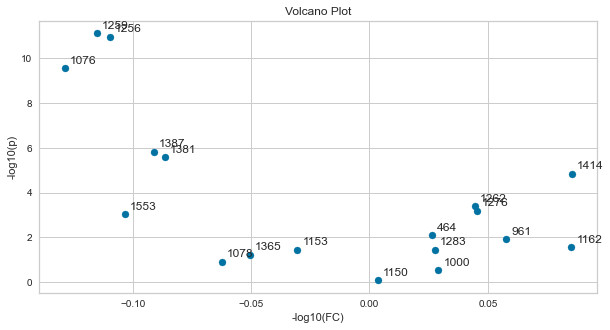

In [2]:
t_test.plot_volcano_t(variables)


# Dimension-Reduction

Dimension-reduction methods are used to condense high dimensional data down to dimensions which provide the most information. We have implemented the principal component analysis (PCA). It performs a change of basis and the new basis is chosen, such that the i-th principal component is orthogonal to the first i-1 principal components and the direction maximizes the variance of the projected data.
We use the Python library sklearn.



## Principal Component Analysis
The principal component analysis (PCA) is one of the methods for dimension-reduction. It performs a change of basis and the new basis is chosen, such that the i-th principal component is orthogonal to the first i-1 principal components and the direction maximizes the variance of the projected data. Instead of considering all the dimensions,
we pick the necessary number of principal components.


PCA Projections
Projections of data into latent space.
Data is colored by response


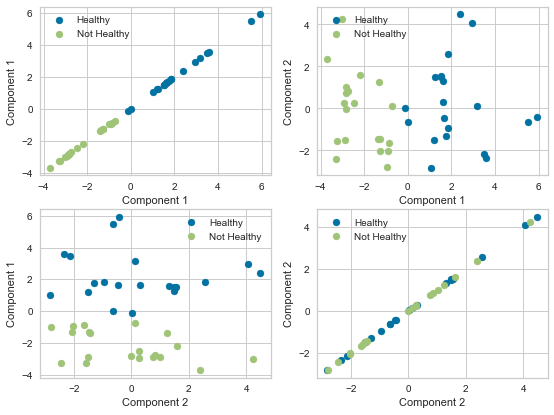

In [3]:
data.normalizeData("autoscale")

pca = adapml_chemometrics.Chemometrics(data.data, "pca", response1D)

print("PCA Projections");pca.plotProjectionScatterMultiClass(2, labels=["Healthy", "Not Healthy"])



## Linear Discriminant Analysis
Linear discriminant analysis is a classifier with a linear decision boundary. We assume normality and fit conditional densities $p(x\; | \; y=0)$ and $p(x \; | \; y=1)$ with mean and covariance parameters $(\mu_0,\sigma_0)$ and $(\mu_1,\sigma_1)$, where $x,\mu_0$ and $\mu_1$ are vectors.
Dimensionality-reduction is done by projecting the input to the most discriminative directions.


LDA Projections
Projections of data into latent space.
Data is colored by response


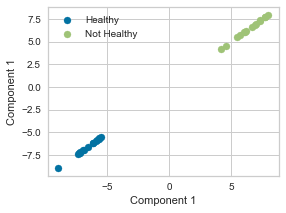

In [4]:
lda = adapml_chemometrics.Chemometrics(data.data, "lda", response1D) # Also Predicts

print("LDA Projections");lda.plotProjectionScatterMultiClass(1, labels=["Healthy", "Not Healthy"])



# Clustering

In this module we use various different clustering methods on spectra. We use the Silhouette method to find the optimal number of clusters. Clustering is done with scipy and sklearn libraries.



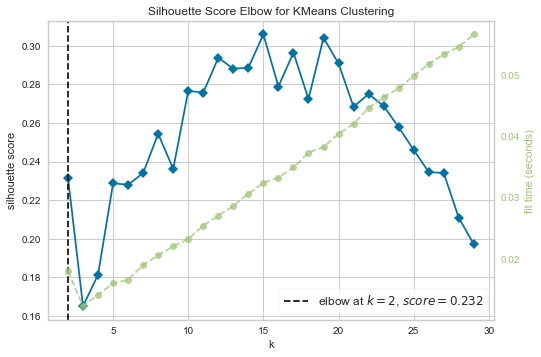

In [5]:
silhouette = adapml_clustering.Clustering(data.data, 'silhouette', 3)
nr_clusters = silhouette.clustnr


## K-Means Clustering

K-means clustering aims to partition the data into $k$ sets and to minimize the Euclidian within-cluster sum of squares (WCSS). It is solved by either Lloyd’s or Elkan’s algorithm and we use sklearn module in Python.


In [6]:
kmeans_cluster = adapml_clustering.Clustering(data.data, 'kmeans', nr_clusters)
kmeans_cluster.getClusterResults(samples)


          Cluster 1       Cluster 2
0      NSCLC_A549_1     SCLC_86M1_2
1     NSCLC_H1703_2     SCLC_86M1_1
2     NSCLC_H1703_1     SCLC_16HV_1
3      NSCLC_A549_2     SCLC_16HV_2
4     NSCLC_H1437_1    SCLC_DMS79_1
5     NSCLC_H2228_1    SCLC_DMS79_2
6     NSCLC_H2228_2     SCLC_H187_2
7     NSCLC_H1437_2     SCLC_H187_1
8     NSCLC_H3122_1     SCLC_H209_1
9      NSCLC_H322_2     SCLC_H524_1
10     NSCLC_H322_1     SCLC_H209_2
11     NSCLC_H358_2     SCLC_H524_2
12    NSCLC_H3122_2      SCLC_H69_1
13     NSCLC_H522_1      SCLC_H82_1
14     NSCLC_H522_2      SCLC_H82_2
15  NSCLC_HCC4006_1      SCLC_H69_2
16     NSCLC_H358_1     SCLC_N417_2
17      NSCLC_PC9_1     SCLC_N417_1
18      NSCLC_PC9_2  SCLC_SW210-5_1
19  NSCLC_HCC4006_2  SCLC_SW210_5_2


## BIRCH Clustering

BIRCH (balance iterative reducing and clustering using hierarchies) is a hierarchical clustering method. The hierarchy is created based on the linear sum and the square sum of data points.



In [7]:
birch_cluster = adapml_clustering.Clustering(data.data, 'birch', nr_clusters)
birch_cluster.getClusterResults(samples)


          Cluster 1       Cluster 2
0      NSCLC_A549_1     SCLC_86M1_2
1     NSCLC_H1703_2     SCLC_86M1_1
2     NSCLC_H1703_1     SCLC_16HV_1
3      NSCLC_A549_2     SCLC_16HV_2
4     NSCLC_H1437_1    SCLC_DMS79_1
5     NSCLC_H2228_1    SCLC_DMS79_2
6     NSCLC_H2228_2     SCLC_H187_2
7     NSCLC_H1437_2     SCLC_H187_1
8     NSCLC_H3122_1     SCLC_H209_1
9      NSCLC_H322_2     SCLC_H524_1
10     NSCLC_H322_1     SCLC_H209_2
11     NSCLC_H358_2     SCLC_H524_2
12    NSCLC_H3122_2      SCLC_H69_1
13     NSCLC_H522_1      SCLC_H82_1
14     NSCLC_H522_2      SCLC_H82_2
15  NSCLC_HCC4006_1      SCLC_H69_2
16     NSCLC_H358_1     SCLC_N417_2
17      NSCLC_PC9_1     SCLC_N417_1
18      NSCLC_PC9_2  SCLC_SW210-5_1
19  NSCLC_HCC4006_2  SCLC_SW210_5_2


## DBSCAN Clustering

DBSCAN is a non-parametric density-based clustering algorithm. It clusters together nearby neighbors, marking further away points as outliers, as they are in the low density area.



In [8]:
dbscan_cluster = adapml_clustering.Clustering(data.data, 'dbscan', nr_clusters)
dbscan_cluster.getClusterResults(samples)


          Cluster 1      Cluster 2
0      NSCLC_A549_1  NSCLC_H1703_2
1      NSCLC_A549_2  NSCLC_H1703_1
2     NSCLC_H1437_1            NaN
3     NSCLC_H2228_1            NaN
4     NSCLC_H2228_2            NaN
5     NSCLC_H1437_2            NaN
6      NSCLC_H322_2            NaN
7      NSCLC_H322_1            NaN
8      NSCLC_H358_2            NaN
9      NSCLC_H522_1            NaN
10     NSCLC_H522_2            NaN
11  NSCLC_HCC4006_1            NaN
12     NSCLC_H358_1            NaN
13      NSCLC_PC9_1            NaN
14      NSCLC_PC9_2            NaN
15  NSCLC_HCC4006_2            NaN
16      SCLC_86M1_2            NaN
17      SCLC_86M1_1            NaN
18      SCLC_16HV_1            NaN
19      SCLC_16HV_2            NaN
20     SCLC_DMS79_1            NaN
21     SCLC_DMS79_2            NaN
22      SCLC_H187_2            NaN
23      SCLC_H187_1            NaN
24      SCLC_H209_1            NaN
25      SCLC_H524_1            NaN
26      SCLC_H209_2            NaN
27      SCLC_H524_2 

## Mean Shift Clustering

The mean shift algorithm is a nonparametric clustering technique which does not require prior knowledge of the number of clusters, and does not constrain the shape of the clusters. It works by starting at data points and iteratevely finding the convergence points for kernel estimate gradient.


In [9]:
meanshift_cluster = adapml_clustering.Clustering(data.data, 'meanshift', nr_clusters)
meanshift_cluster.getClusterResults(samples)


          Cluster 1      Cluster 2
0      NSCLC_A549_1  NSCLC_H1703_2
1      NSCLC_A549_2  NSCLC_H1703_1
2     NSCLC_H1437_1            NaN
3     NSCLC_H2228_1            NaN
4     NSCLC_H2228_2            NaN
5     NSCLC_H1437_2            NaN
6     NSCLC_H3122_1            NaN
7      NSCLC_H322_2            NaN
8      NSCLC_H322_1            NaN
9      NSCLC_H358_2            NaN
10    NSCLC_H3122_2            NaN
11     NSCLC_H522_1            NaN
12     NSCLC_H522_2            NaN
13  NSCLC_HCC4006_1            NaN
14     NSCLC_H358_1            NaN
15      NSCLC_PC9_1            NaN
16      NSCLC_PC9_2            NaN
17  NSCLC_HCC4006_2            NaN
18      SCLC_86M1_2            NaN
19      SCLC_86M1_1            NaN
20      SCLC_16HV_1            NaN
21      SCLC_16HV_2            NaN
22     SCLC_DMS79_1            NaN
23     SCLC_DMS79_2            NaN
24      SCLC_H187_2            NaN
25      SCLC_H187_1            NaN
26      SCLC_H209_1            NaN
27      SCLC_H524_1 

## Gaussian Mixture Clustering

Gaussian mixture models (GMMs) cluster the data by fitting a mixture of Gaussian models to the data and clustering together data points with similar parameter estimates. It's closely related to k-means clustering but allows for less restrictive cluster shapes. K-means fits a multi-dimensional ball as the perimeter, but GMMs can also fit ellipsoidal shapes and other shapes.



In [10]:
gaussian_cluster = adapml_clustering.Clustering(data.data, 'gaussian', nr_clusters)
gaussian_cluster.getClusterResults(samples)


          Cluster 1       Cluster 2
0      NSCLC_A549_1    NSCLC_H522_1
1     NSCLC_H1703_2    NSCLC_H522_2
2     NSCLC_H1703_1     SCLC_86M1_2
3      NSCLC_A549_2     SCLC_86M1_1
4     NSCLC_H1437_1     SCLC_16HV_1
5     NSCLC_H2228_1     SCLC_16HV_2
6     NSCLC_H2228_2    SCLC_DMS79_1
7     NSCLC_H1437_2    SCLC_DMS79_2
8     NSCLC_H3122_1     SCLC_H187_2
9      NSCLC_H322_2     SCLC_H187_1
10     NSCLC_H322_1     SCLC_H209_1
11     NSCLC_H358_2     SCLC_H524_1
12    NSCLC_H3122_2     SCLC_H209_2
13  NSCLC_HCC4006_1     SCLC_H524_2
14     NSCLC_H358_1      SCLC_H69_1
15      NSCLC_PC9_1      SCLC_H82_1
16      NSCLC_PC9_2      SCLC_H82_2
17  NSCLC_HCC4006_2      SCLC_H69_2
18              NaN     SCLC_N417_2
19              NaN     SCLC_N417_1
20              NaN  SCLC_SW210-5_1
21              NaN  SCLC_SW210_5_2


## Hierarchical Clustering

Hierarchical clustering builds hierarchies of clusters based on a chosen metric and a linkage scheme.
We used cosine distance and average linkage scheme.


          Cluster 1       Cluster 2
0      NSCLC_A549_1     SCLC_86M1_2
1     NSCLC_H1703_2     SCLC_86M1_1
2     NSCLC_H1703_1     SCLC_16HV_1
3      NSCLC_A549_2     SCLC_16HV_2
4     NSCLC_H1437_1    SCLC_DMS79_1
5     NSCLC_H2228_1    SCLC_DMS79_2
6     NSCLC_H2228_2     SCLC_H187_2
7     NSCLC_H1437_2     SCLC_H187_1
8     NSCLC_H3122_1     SCLC_H209_1
9      NSCLC_H322_2     SCLC_H524_1
10     NSCLC_H322_1     SCLC_H209_2
11     NSCLC_H358_2     SCLC_H524_2
12    NSCLC_H3122_2      SCLC_H69_1
13     NSCLC_H522_1      SCLC_H82_1
14     NSCLC_H522_2      SCLC_H82_2
15  NSCLC_HCC4006_1      SCLC_H69_2
16     NSCLC_H358_1     SCLC_N417_2
17      NSCLC_PC9_1     SCLC_N417_1
18      NSCLC_PC9_2  SCLC_SW210-5_1
19  NSCLC_HCC4006_2  SCLC_SW210_5_2


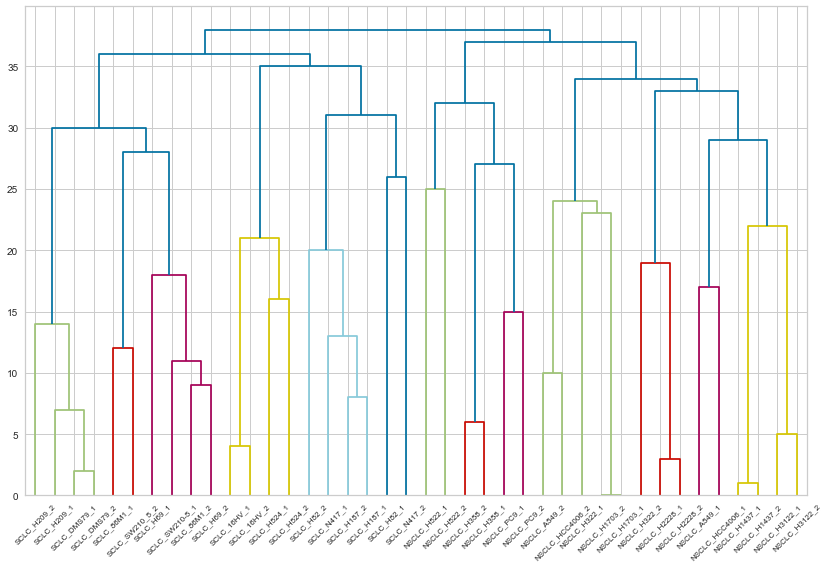

In [11]:
hierarchical_cluster = adapml_clustering.Clustering(data.data, 'hierarchical', nr_clusters)
hierarchical_cluster.getClusterResults(samples)
hierarchical_cluster.plot_dendrogram(samples)


# Classification

Classification methods aim to classify the response of samples. The given data is separated into
a training set and a testing set. The model parameters are found from the training set and the testing set is used to quantify the model accuracy.
The methods are from sklearn package.


## Partial Least Squares-Discriminant Analysis



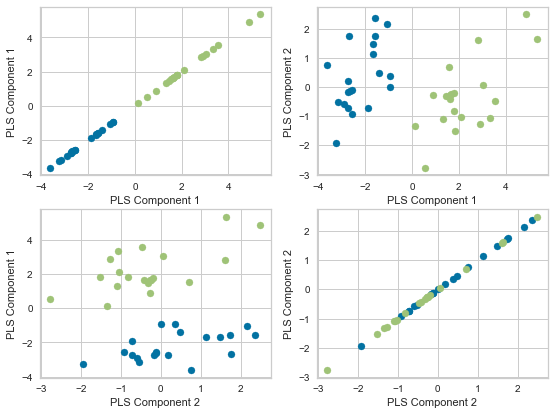

In [12]:
def plotProjectionScatterMultiClass(pc, resp, num_var):
    plt.figure(figsize=(24, 18))

    for i in range(num_var):
        for j in range(num_var):
            plt.subplot(5,5,5*(i) + j + 1)
            for c in range(resp.shape[1]):
                inx = np.where(resp[:,c] == 1)[0]
                tmp = pc[inx,:]
                pc1 = tmp[:,i]
                pc2 = tmp[:,j]
                plt.scatter(pc1, pc2)
            plt.xlabel("PLS Component "+str(i+1))
            plt.ylabel("PLS Component "+str(j+1))

    plt.show()

data = load_data.loadDataPandas(path_to_data)
d = data.to_numpy()
var_index = data.columns.values.tolist()

resp = load_data.getResponseMatrix2D()

norm_trans = pre.StandardScaler().fit(d)
data_norm = norm_trans.transform(d)
#data_norm, norm_trans = pre.mean_center(d)
#In-built preprocessing method - TBD

pls = PLS().fit(data_norm, resp)
pls_trans = pls.transform(data_norm)

plotProjectionScatterMultiClass(pls_trans, resp, 2)



## Support Vector Machines

Classification via SVM is done by fitting a linear plane to the latent space but only considering a subset of inputs in the fitting process.
The quantity $R^2$ measures what percentage of variation was explained by the model in the training set. The quantity $Q^2$ shows the same measurement but for the test data set.


In [13]:
data = adapml_data.DataImport(path_to_data)
svm = adapml_classification.Classification(data.data, response1D, 'svm', .75, kfolds=3)

adapml_classification.print_model_stats(svm, "SVM")



SVM Validated Parameters:  {'kernel': 'linear', 'shrinking': True}
SVM: R^2=1.0 Q^2=1.0


## Random Forest

Random forests is an ensemble classification method.
It works by constructing multiple decision trees based on the training data and then choosing the class, chosen by the most number of decision trees.
The quantity $R^2$ measures what percentage of variation was explained by the model in the training set. The quantity $Q^2$ shows the same measurement but for the test data set.


In [14]:
data = adapml_data.DataImport(path_to_data)
rnf = adapml_classification.Classification(data.data, response1D, 'randomforest', .75, kfolds=3)

adapml_classification.print_model_stats(rnf, "RF")


Random Forest Validated Parameters:  {'criterion': 'gini', 'n_estimators': 10}
RF: R^2=0.8660714285714286 Q^2=1.0


## Logistic Regression

Logistic regression uses a logistic function to model a binary dependent variable. The confusion matrix displays the accuracy of the model for the test data set.
We use the packages sklearn for the logistic regression and seaborn for the confusion matrix.


Accuracy: 1.0


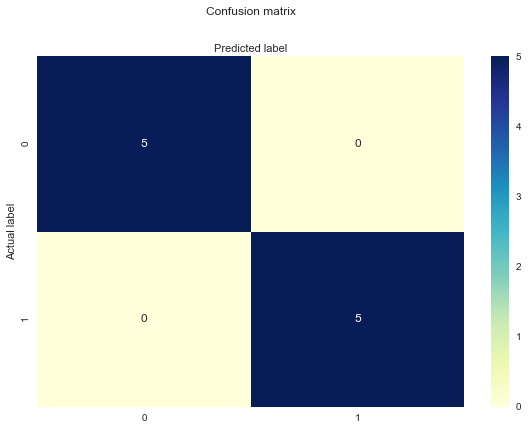

In [15]:
data = adapml_data.DataImport(path_to_data)

logistic = adapml_classification.Classification(data.data, response1D, 'logistic', .25)
print(logistic)


# Regression



## Linear Regression

Linear regression fits a linear plane between the dependant variables and the response. The linear plane models the relationship between them and allows for prediction or explain variation.



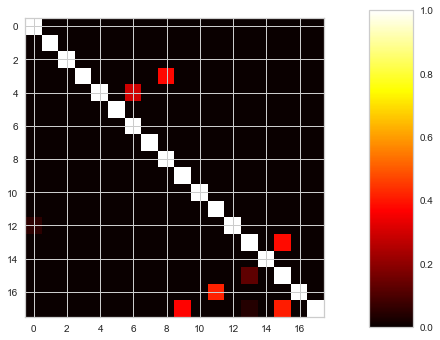

In [16]:
reg = adapml_regression.Regression(data.data, "linear")
reg.linear
